# Malenoma Skin Cancer Detection

In [ ]:
#Importing all the important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

### Data Reading/Data Understanding

Defining the path for train and test images

Here is the link for the dataset:---

https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view


In [2]:
# Importing Skin Cancer Data
data_dir_train = pathlib.Path(r"C:\Users\aditia sharma\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\aditia sharma\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [4]:
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118


In [5]:
# Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
# Loading the training data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Loading the validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Loading the testing data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [9]:
# Listing out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset visualisation

Creating a code to visualize one instance of all the nine classes present in the dataset

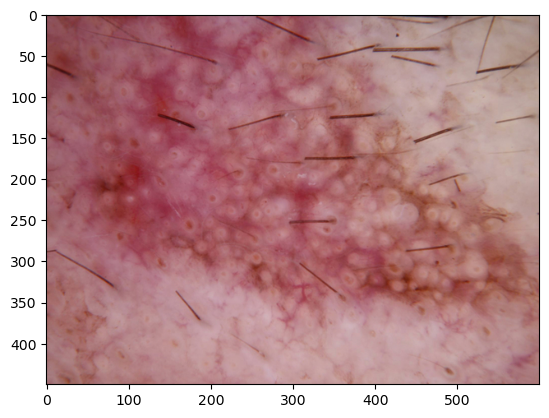

In [10]:
image = plt.imread((list(data_dir_train.glob(class_names[0]+'/*.jpg'))[0]))
plt.imshow(image)

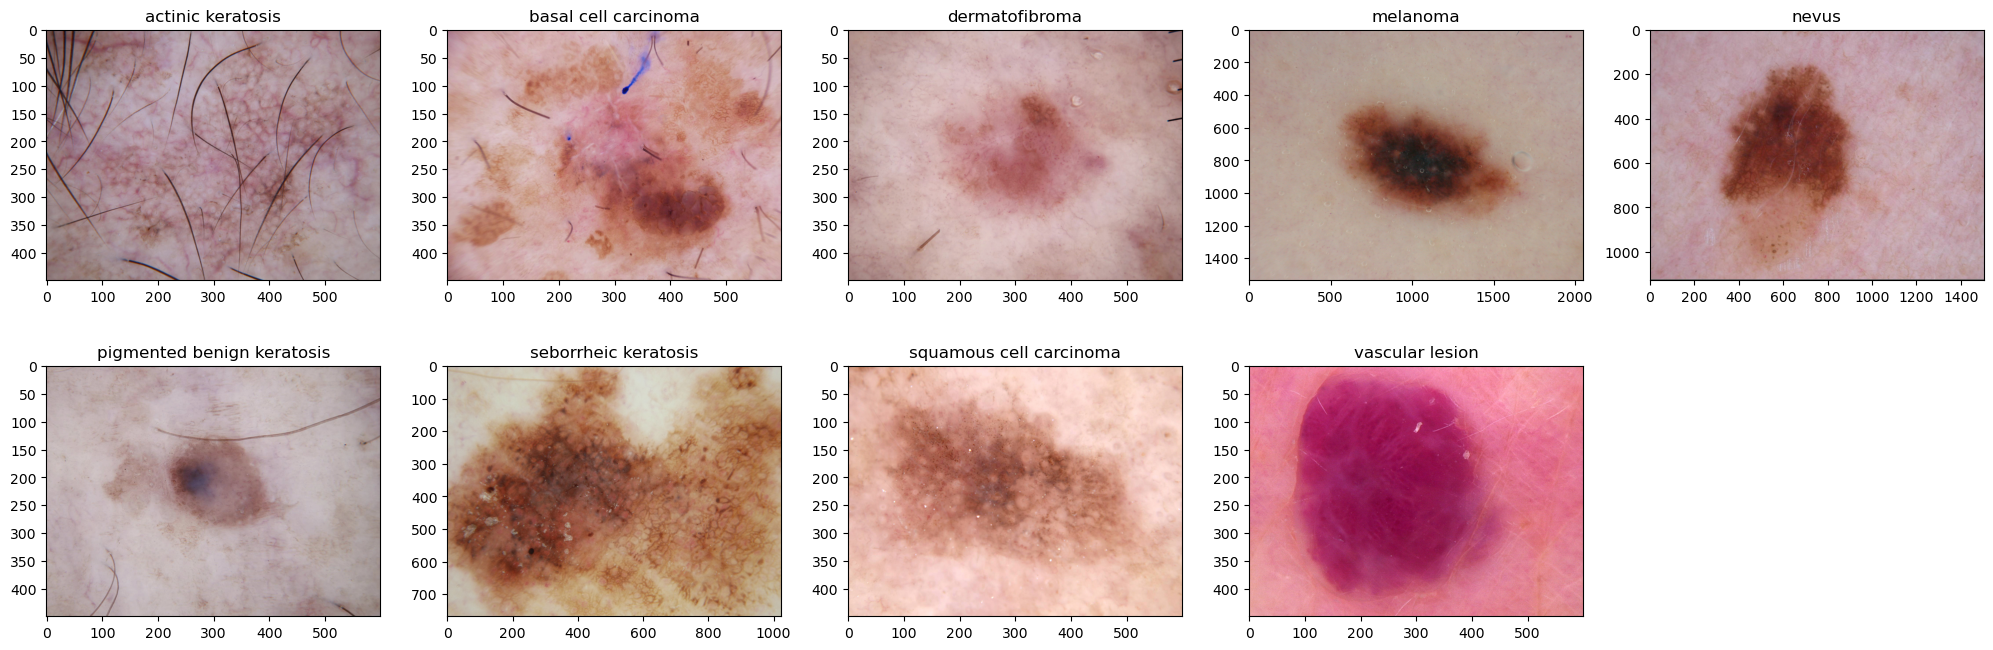

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [12]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# `Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.\
# `Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
# Method to create plots of the loss and accuracy on the training and validation sets:
def plot_cnn_metrics(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Model Building & training : 

Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).

Choosing an appropriate optimiser and loss function for model training

Training the model for ~20 epochs

Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [14]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [15]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 259200)            

In [16]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 233s 4s/step - loss: 2.7026 - accuracy: 0.2288 - val_loss: 1.9572 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 194s 3s/step - loss: 1.8480 - accuracy: 0.3119 - val_loss: 1.6894 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 231s 4s/step - loss: 1.5388 - accuracy: 0.4481 - val_loss: 1.5821 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 208s 4s/step - loss: 1.4583 - accuracy: 0.4922 - val_loss: 1.5276 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 207s 4s/step - loss: 1.3057 - accuracy: 0.5525 - val_loss: 1.6749 - val_accuracy: 0.4139
Epoch 6/20
56/56 [==============================] - 209s 4s/step - loss: 1.1289 - accuracy: 0.6016 - val_loss: 1.6261 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 209s 4s/step - loss: 1.0097 - accuracy: 0.6429 - val_loss: 1.5488 - val_accuracy: 0.4877
Epoch 8/20


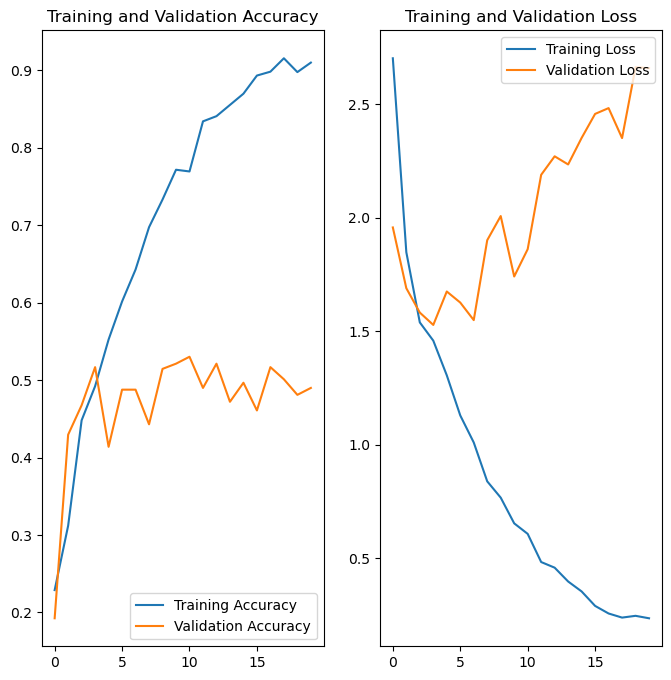

In [17]:
plot_cnn_metrics(history,epochs)

As the training accuracy increases over time, where as the validation accuracy stall at 50% accuracy in training process.

As the training loss dereases with epochs the validation loss increases.

Training accuracy and validation accuracy are off by large margins, and the model has achieved around 50% accuracy on the validation set.
    
The difference in accuracy between training and validation accuracy is noticeable which is a sign of overfitting.

## Choosing an appropriate data augmentation strategy to resolve underfitting/overfitting

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

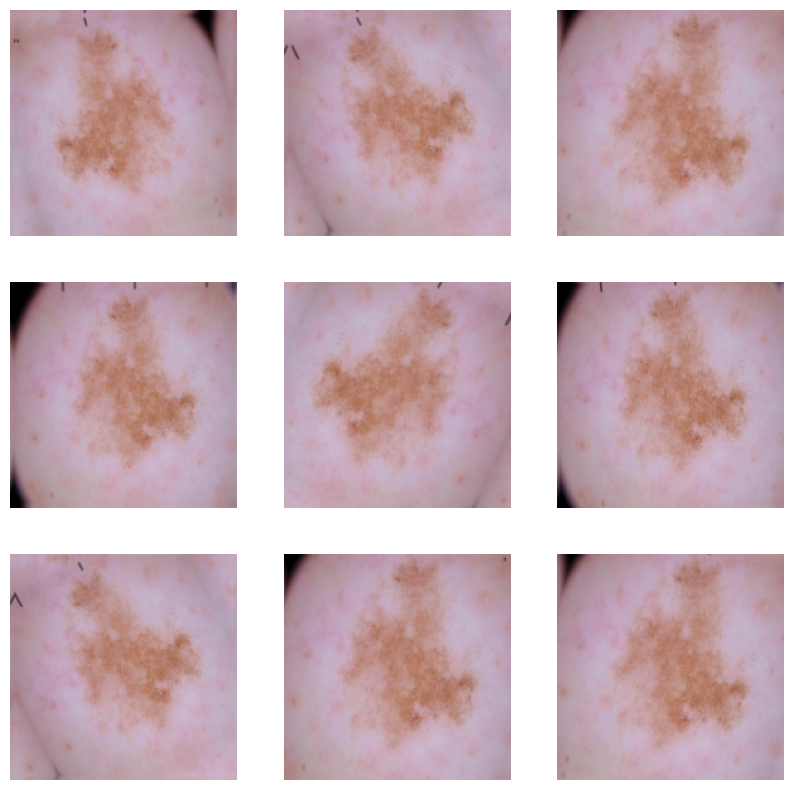

In [19]:
# visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Model Building & training on the augmented data : 

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~20 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [20]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [21]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [22]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 226s 4s/step - loss: 2.9814 - accuracy: 0.2679 - val_loss: 1.8022 - val_accuracy: 0.3557
Epoch 2/20
56/56 [==============================] - 211s 4s/step - loss: 1.6875 - accuracy: 0.3828 - val_loss: 1.5242 - val_accuracy: 0.5034
Epoch 3/20
56/56 [==============================] - 203s 4s/step - loss: 1.4985 - accuracy: 0.4788 - val_loss: 1.6131 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 201s 4s/step - loss: 1.5044 - accuracy: 0.4715 - val_loss: 1.6372 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 199s 4s/step - loss: 1.4154 - accuracy: 0.5039 - val_loss: 1.4901 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 213s 4s/step - loss: 1.3979 - accuracy: 0.5179 - val_loss: 1.4995 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 205s 4s/step - loss: 1.3234 - accuracy: 0.5296 - val_loss: 1.4273 - val_accuracy: 0.5459
Epoch 8/20
56

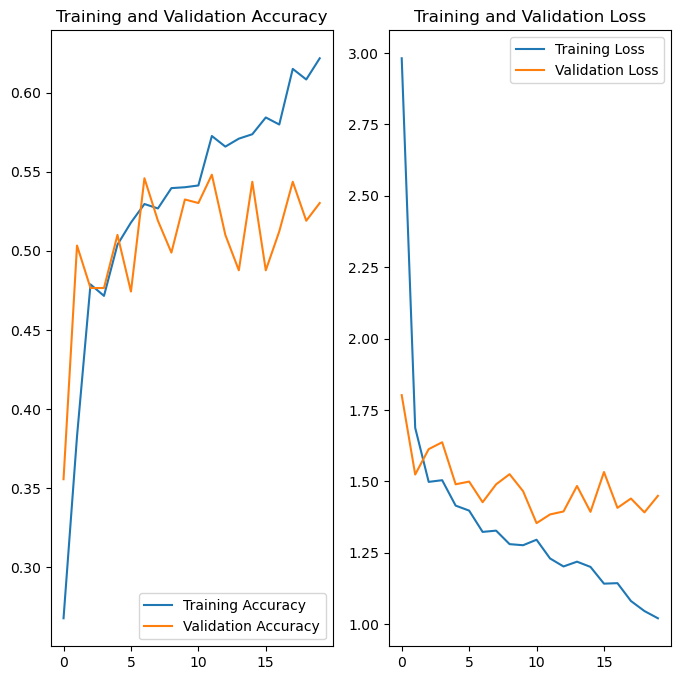

In [23]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.
As the training loss decreases with epochs the validation loss decreases and stalls.

The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around accuracy on the validation set.

The difference in accuracy between training and validation accuracy is still slightly noticeable which is a sign of overfitting.

# Model Building & training on the augmented data with dropout : 

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~20 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [24]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [25]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [26]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 218s 4s/step - loss: 3.4082 - accuracy: 0.1892 - val_loss: 1.9878 - val_accuracy: 0.1946
Epoch 2/20
56/56 [==============================] - 207s 4s/step - loss: 1.9380 - accuracy: 0.2623 - val_loss: 1.7610 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 207s 4s/step - loss: 1.7019 - accuracy: 0.3929 - val_loss: 1.7311 - val_accuracy: 0.4295
Epoch 4/20
56/56 [==============================] - 208s 4s/step - loss: 1.5542 - accuracy: 0.4559 - val_loss: 1.5518 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 215s 4s/step - loss: 1.5482 - accuracy: 0.4537 - val_loss: 1.4790 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 218s 4s/step - loss: 1.4040 - accuracy: 0.4944 - val_loss: 1.4430 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 216s 4s/step - loss: 1.4195 - accuracy: 0.4967 - val_loss: 1.4932 - val_accuracy: 0.4899
Epoch 8/20
56

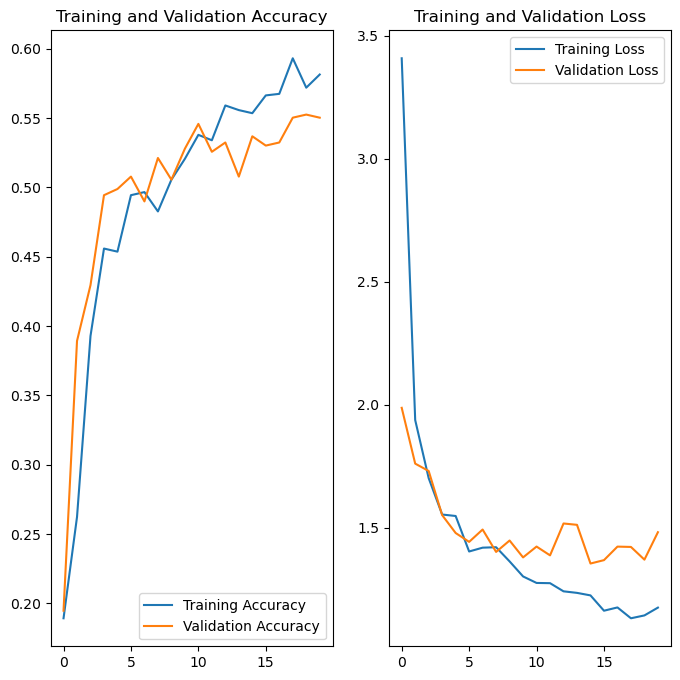

In [27]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.

As the training loss decreases with epochs the validation loss decreases

The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around accuracy on the validation set.

The difference in accuracy between training and validation accuracy is <b>very less

### **We can clearly see that the overfitting of the model has redused significantly when compared the earlier models**

# Class distribution: 

Examining the current class distribution in the training dataset

Datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. 

Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


* seborrheic keratosis with 77 samples has the least number of samples

* pigmented benign keratosis with 462 samples dominate the data in terms proportionate number of samples

# Handling class imbalances: 

Rectifing class imbalances present in the training dataset with Augmentor library.

In [29]:
!pip install Augmentor

In [42]:
import Augmentor
path_to_training_dataset = r"C:\Users\aditia sharma\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
data_dir_train = pathlib.Path(path_to_training_dataset)
data_dir_test = pathlib.Path(r"C:\Users\aditia sharma\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

for class_name in class_names:
    class_dir = os.path.join(path_to_training_dataset, class_name)

    if os.path.exists(class_dir):
        # Initialize Augmentor pipeline
        p = Augmentor.Pipeline(source_directory=class_dir, output_directory=r"C:\Users\aditia sharma\Downloads\Output_dir\New_train" + class_name + "/")
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)  # Generate 500 augmented samples
    else:
        print(f"Directory for class '{class_name}' not found.")


Initialised with 114 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainactinic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25DE3FBE5D0>: 100%|█| 500/500 [00:05<00:00, 90.62 Samples/


Initialised with 376 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainbasal cell carcinoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x25FCDEA0250>: 100%|█| 500/500 [00:06<00:


Initialised with 95 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_traindermatofibroma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25DE4081F50>: 100%|█| 500/500 [00:06<00:00, 78.77 Samples/


Initialised with 438 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainmelanoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x25FCB715750>: 100%|█| 500/500 [00:32<00


Initialised with 357 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainnevus/.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x25DE3430590>: 100%|█| 500/500 [00:33<00:00, 14.86 Sample


Initialised with 462 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainpigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25DE3997ED0>: 100%|█| 500/500 [00:07<00:00, 68.76 Samples/


Initialised with 77 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainseborrheic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x25FCAEA9E10>: 100%|█| 500/500 [00:18<00:00, 27.58 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainsquamous cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25DE40E2AD0>: 100%|█| 500/500 [00:08<00:00, 60.03 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\aditia sharma\Downloads\Output_dir\New_trainvascular lesion/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x25DE3F843D0>: 100%|█| 500/500 [00:08<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 

Lets take a look at total count of augmented images.

In [43]:
import pathlib

data_dir_train = pathlib.Path(r"C:\Users\aditia sharma\Downloads\Output_dir")
image_count_train = len(list(data_dir_train.glob('**/*.jpg')))
print(image_count_train)


4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [53]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [54]:
dict_new = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])

In [55]:
df['Label'].value_counts()

Label
New_trainactinic keratosis             500
New_trainbasal cell carcinoma          500
New_traindermatofibroma                500
New_trainmelanoma                      500
New_trainnevus                         500
New_trainpigmented benign keratosis    500
New_trainseborrheic keratosis          500
New_trainsquamous cell carcinoma       500
New_trainvascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [56]:
# initializing the parameter to load the images
batch_size = 32
img_height = 180
img_width = 180

In [57]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


# Model Building & training on the rectified class imbalance data : 

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~30 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [59]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [60]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 90, 90, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 45, 128)       0         
 ng2D)                                                

In [61]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 434s 4s/step - loss: 2.5385 - accuracy: 0.2533 - val_loss: 1.7884 - val_accuracy: 0.3311
Epoch 2/30
113/113 [==============================] - 468s 4s/step - loss: 1.6007 - accuracy: 0.3936 - val_loss: 1.5802 - val_accuracy: 0.4044
Epoch 3/30
113/113 [==============================] - 459s 4s/step - loss: 1.4657 - accuracy: 0.4428 - val_loss: 1.4259 - val_accuracy: 0.4478
Epoch 4/30
113/113 [==============================] - 5265s 47s/step - loss: 1.4147 - accuracy: 0.4544 - val_loss: 1.4685 - val_accuracy: 0.4322
Epoch 5/30
113/113 [==============================] - 414s 4s/step - loss: 1.3545 - accuracy: 0.4825 - val_loss: 1.4428 - val_accuracy: 0.4344
Epoch 6/30
113/113 [==============================] - 422s 4s/step - loss: 1.3351 - accuracy: 0.4831 - val_loss: 1.4497 - val_accuracy: 0.4244
Epoch 7/30
113/113 [==============================] - 1914s 17s/step - loss: 1.2960 - accuracy: 0.5156 - val_loss: 1.3775 - val_accuracy: 0.

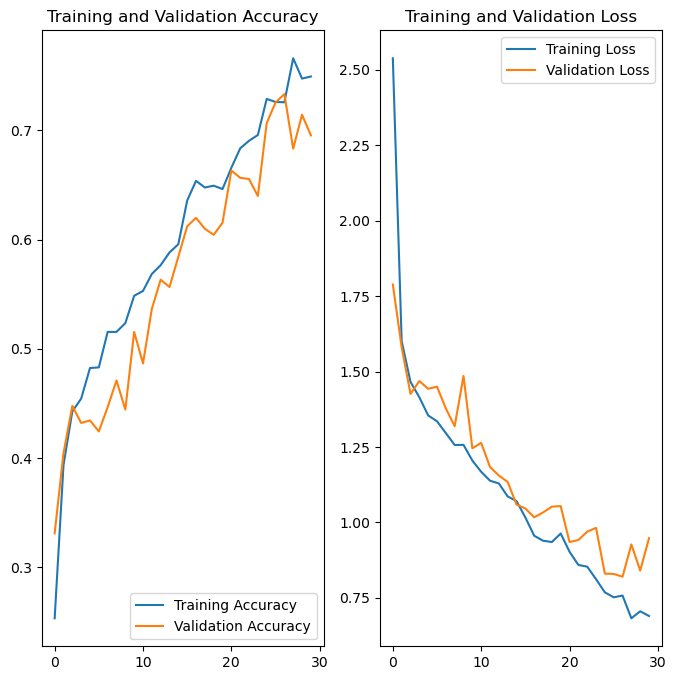

In [62]:
# Visualizing model results
plot_cnn_metrics(history,epochs)

As the training accuracy increases linearly over time, where as the validation accuracy increases in training process.

As the training loss decreases with epochs the validation loss also decreases.

The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around 70% accuracy on the validation set.

The difference in accuracy between training and validation accuracy is also less.

Improved the accuracy from 55% to 70%.


In [63]:
import tensorflow as tf
import keras
import pandas as pd
import Augmentor
import numpy as np
import glob

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Pandas version:", pd.__version__)
print("Augmentor version:", Augmentor.__version__)
print("NumPy version:", np.__version__)
print("Glob module is part of Python's standard library, hence does not have a version attribute.")


TensorFlow version: 2.15.0
Keras version: 2.15.0
Pandas version: 2.0.3
Augmentor version: 0.2.12
NumPy version: 1.24.3
Glob module is part of Python's standard library, hence does not have a version attribute.
